# **My First Web Scraping Beginner Project**

# **Books to Scrape**

In this project, I scraped book data from the Books to Scrape website
(http://books.toscrape.com/), a site designed for practicing web scraping.

# **Steps involved**:
1. Extracted book details (Title, Price, Rating, and Availability)
   using Python's requests and BeautifulSoup libraries.
2. Cleaned and transformed the scraped data into a structured Pandas DataFrame.
3. Exported the dataset to CSV for further analysis.
4. Performed exploratory data analysis (EDA) using Pandas and Matplotlib,
   including:
   - Distribution of book ratings
   - Relationship between ratings and prices
   - Identifying the most expensive and highest-rated books

# **Skills demonstrated**:
- Web scraping (requests, BeautifulSoup)
- Data cleaning and structuring
- Data visualization (Matplotlib)
- Exploratory analysis and insights generation

This project highlights my ability to collect data from the web, transform it into usable formats, and extract meaningful insights. It also forms part of my growing portfolio in data analytics and Python programming.


In [1]:
#importing the neccessary libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
url = "https://books.toscrape.com/"
response=requests.get(url)
if response.status_code == 200:
  print("The page loaded correctly")
else:
    print(f"Failed to load page. Status Code {response.status_code}")

The page loaded correctly


In [3]:

titles=[]
prices_euro = []
availability = []
rate_numeric= {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}
rating = []

for page in range(1,51):
  if page == 1:
      url = "https://books.toscrape.com/"
  else:
     url= f"https://books.toscrape.com/catalogue/page-{page}.html"

  response=requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  books = soup.find_all(name="article", attrs={"class":"product_pod"})


  for b in books:
      title = b.h3.a["title"]
      titles.append(title)

  for p in books:
      price= p.find("p", class_="price_color").text.replace("Â£","")
      prices_euro.append(price)

  for a in books:
      available = a.find("p", class_="instock availability").text.strip()
      availability.append(available)


  for r in books:
      rate_tag = r.find("p", class_="star-rating")
      rate = rate_tag["class"][1]
      numeric = rate_numeric[rate]
      rating.append(numeric)



print(f"Books scraped:{len(titles)}")
print(f"Prices:{len(prices_euro)}")
print(f"Availabity:{len(availability)}")
print(f"Rating:{len(rating)}")

Books scraped:1000
Prices:1000
Availabity:1000
Rating:1000


In [4]:
data = pd.DataFrame({
    "Title": titles,
    "Book_availability": availability,
    "Price_euro": prices_euro,
    "Rating": rating
})

data.head()

,Title,Book_availability,Price_euro,Rating
0,A Light in the Attic,In stock,51.77,3
1,Tipping the Velvet,In stock,53.74,1
2,Soumission,In stock,50.10,1
3,Sharp Objects,In stock,47.82,4
4,Sapiens: A Brief History of Humankind,In stock,54.23,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              1000 non-null   object
 1   Book_availability  1000 non-null   object
 2   Price_euro         1000 non-null   object
 3   Rating             1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [6]:
data.dtypes

,0
Title,object
Book_availability,object
Price_euro,object
Rating,int64


In [7]:
data["Price_euro"]=data["Price_euro"].astype('float')

In [8]:
data.describe()

,Price_euro,Rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


This chart displays how many books fall into each star rating (1 to 5) 
Most books are rated 1 star: 226 books



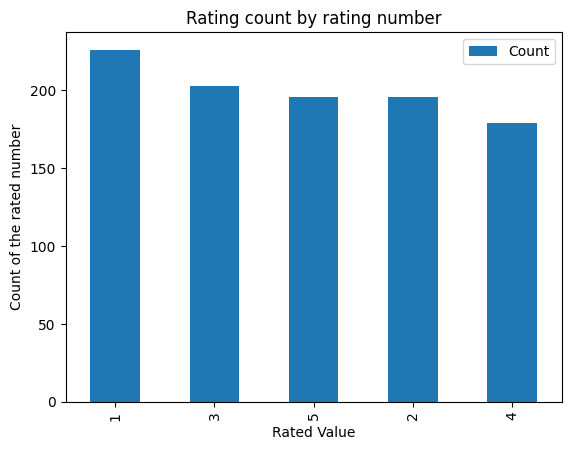

In [14]:
rating_count=data["Rating"].value_counts().reset_index()
rating_count.columns=["Rating", "Count"]

print("This chart displays how many books fall into each star rating (1 to 5) \n"
"Most books are rated 1 star: 226 books\n")

rating_count.plot(kind="bar", x = "Rating", y="Count")
plt.title("Rating count by rating number")
plt.xlabel("Rated Value")
plt.ylabel("Count of the rated number")
plt.show()

In [15]:
highly_rated_book = data[data["Rating"] == data["Rating"].max()]

print("Books with a rating of 5 \n")
print(highly_rated_book[["Title", "Rating","Price_euro"]].head(10))

Books with a rating of 5 

                                                Title  Rating  Price_euro
4               Sapiens: A Brief History of Humankind       5       54.23
12                                        Set Me Free       5       17.46
13  Scott Pilgrim's Precious Little Life (Scott Pi...       5       52.29
14                          Rip it Up and Start Again       5       35.02
23                         Chase Me (Paris Nights #2)       5       25.27
24                                         Black Dust       5       34.53
28  Worlds Elsewhere: Journeys Around Shakespeareâ...       5       40.30
30  The Four Agreements: A Practical Guide to Pers...       5       17.66
32                                  The Elephant Tree       5       23.82
34                                     Sophie's World       5       15.94


In [16]:
Expensive_book = data[data["Price_euro"] == data["Price_euro"].max()]

print(" Books with a high price \n")
print(Expensive_book[["Title","Price_euro", "Rating"]].head(10))

 Books with a high price 

                                  Title  Price_euro  Rating
648  The Perfect Play (Play by Play #1)       59.99       3


/tmp/ipython-input-1599536105.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


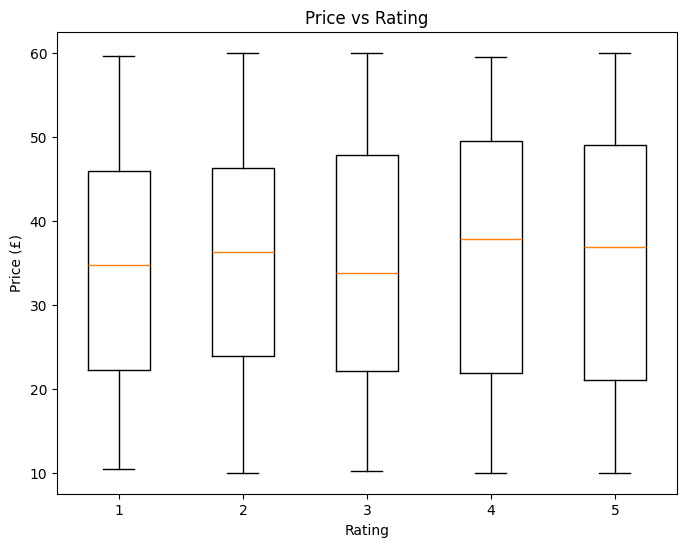

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(
    [data[data["Rating"]==r]["Price_euro"] for r in sorted(data["Rating"].unique())],
    labels=sorted(data["Rating"].unique())
)
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price (£)")
plt.show()



The boxplot compares book prices across different rating levels (1–5 stars). The median price (orange line) is fairly consistent across ratings, ranging between £30–£38. This suggests that book ratings do not have a strong effect on pricing.

Books in every rating category can range widely in price (£10–£60). Interestingly, 4-star and 5-star books show slightly higher medians, but the overlap across all groups indicates that higher ratings don’t guarantee higher prices.

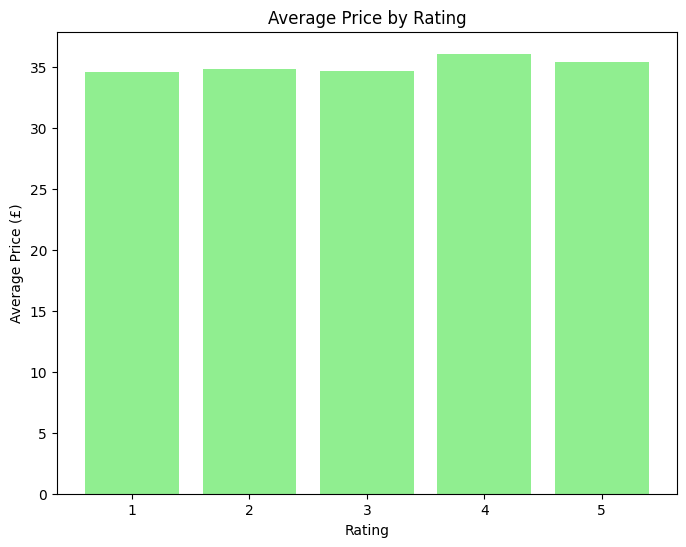

In [19]:
avg_price = data.groupby("Rating")["Price_euro"].mean()

plt.figure(figsize=(8,6))
plt.bar(avg_price.index, avg_price.values, color="lightgreen")
plt.title("Average Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price (£)")
plt.show()


In [21]:
data.to_csv("books.csv", index=False, encoding="utf-8")